# SimuPark: Un parque simulado

Desarrollado por: 
> Daniel David Delgado Cervantes - 2182066

13076794.438915597


Text(0, 0.5, 'Frecuencia')

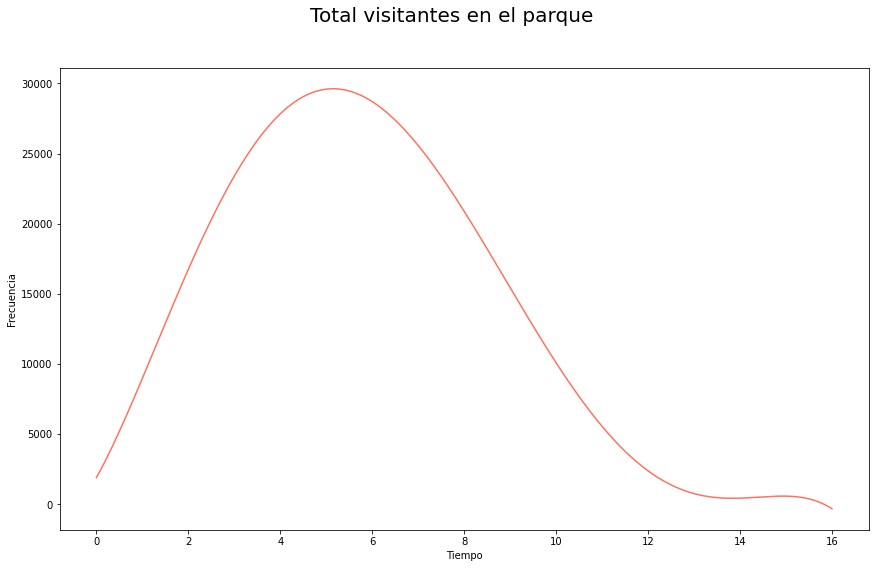

In [1]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  50000 * (0.374974200206538 + 1.18610051004199 * ((x) ** 1 ) + 0.328707107843164 * ((x) ** 2 ) + -0.104475271890136 * ((x) ** 3 ) + 0.00811912062395833 * ((x) ** 4 ) + -0.00019811264586807 * ((x) ** 5 )) / 10
print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [2]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

park = Park(
    fn=fn
)

park.startDayBaseAlt(maxEntryRate=50000/16)

KeyboardInterrupt: 

25561
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['Dropper', 'Tornado', 'BumpCars', 'SlowRiver', 'StarWarsRide', 'SpaceMountain']
['Tourist']


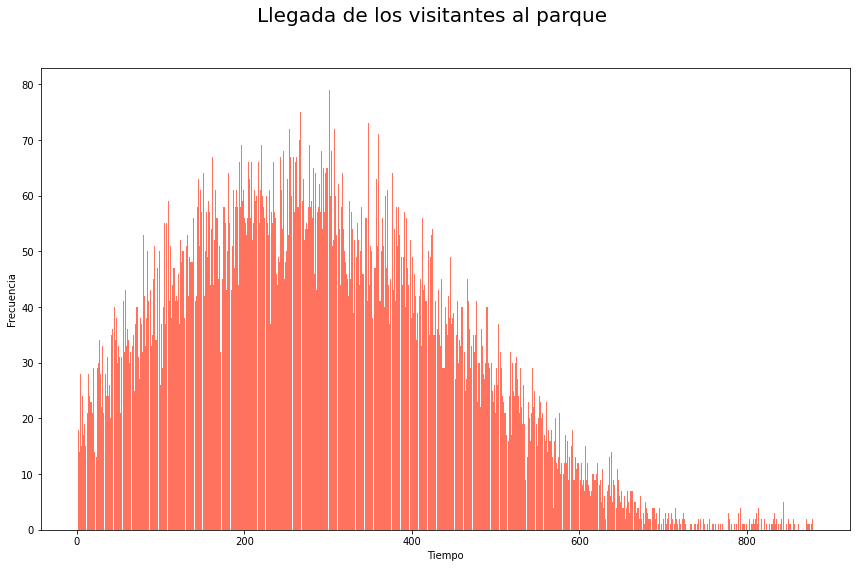

In [3]:
print(len(park.guests))

y = [guest.arrivalTime for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guestArchetypes])

In [4]:
guestData = []
columnName = [
    'Archetype',
    'arrivalTime',
    'departureTime',
    'timeInPark',
    'maxWait',
    'attractionsExperienced',
    'totalWaitTime',
    'averageWaitTime',
    ]
for guest in park.guests:
    curGuest = []

    curGuest.append(guest.archetype)
    curGuest.append(guest.arrivalTime)
    curGuest.append(guest.departureTime)
    curGuest.append(guest.departureTime - guest.arrivalTime)
    curGuest.append(guest.maxWait)
    curGuest.append(guest.attractionsExperienced)
    curGuest.append(guest.totalWaitTime)
    if guest.attractionsExperienced == 0:
        curGuest.append(0)
    else: 
        curGuest.append(guest.totalWaitTime / guest.attractionsExperienced)

    guestData.append(curGuest)

guestDF = pd.DataFrame(guestData, columns=columnName)
guestDF

,Archetype,arrivalTime,departureTime,timeInPark,maxWait,attractionsExperienced,totalWaitTime,averageWaitTime
0,Tourist,1,635,634,116,19,301,15.842105
1,Tourist,1,525,524,35,6,29,4.833333
2,Tourist,1,407,406,46,13,95,7.307692
3,Tourist,1,418,417,98,7,78,11.142857
4,Tourist,1,436,435,84,6,142,23.666667
...,...,...,...,...,...,...,...,...
25556,Tourist,877,1283,406,45,3,62,20.666667
25557,Tourist,878,1317,439,42,1,62,62.000000
25558,Tourist,878,1201,323,101,1,45,45.000000
25559,Tourist,879,1228,349,58,1,76,76.000000


Atracciones experimentadas promedio: 3.7353781150972183


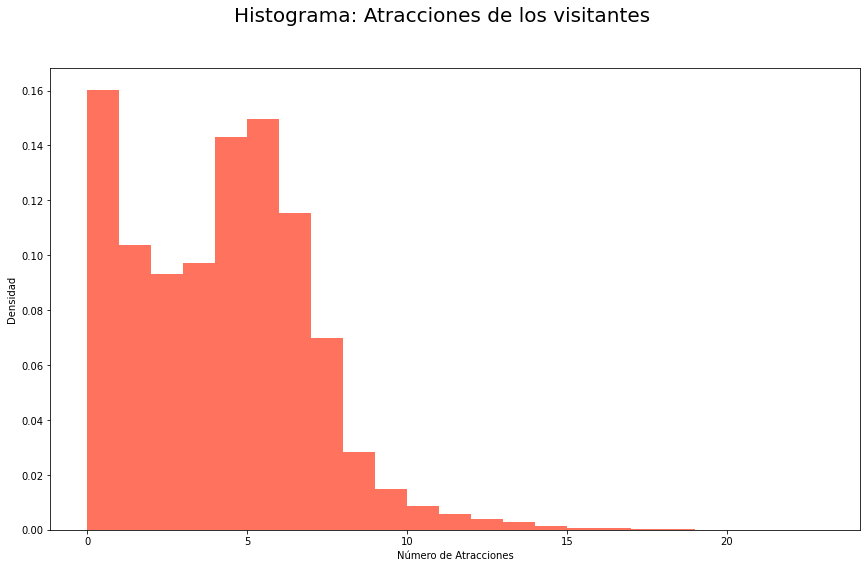

In [5]:
attrExp = [guest.attractionsExperienced for guest in park.guests]
attrExp

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(attrExp, bins=np.max(guestDF['attractionsExperienced']), density=True, color="#ff725e");
fig.suptitle('Histograma: Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')

52.59402509295248


Text(0, 0.5, 'Densidad')

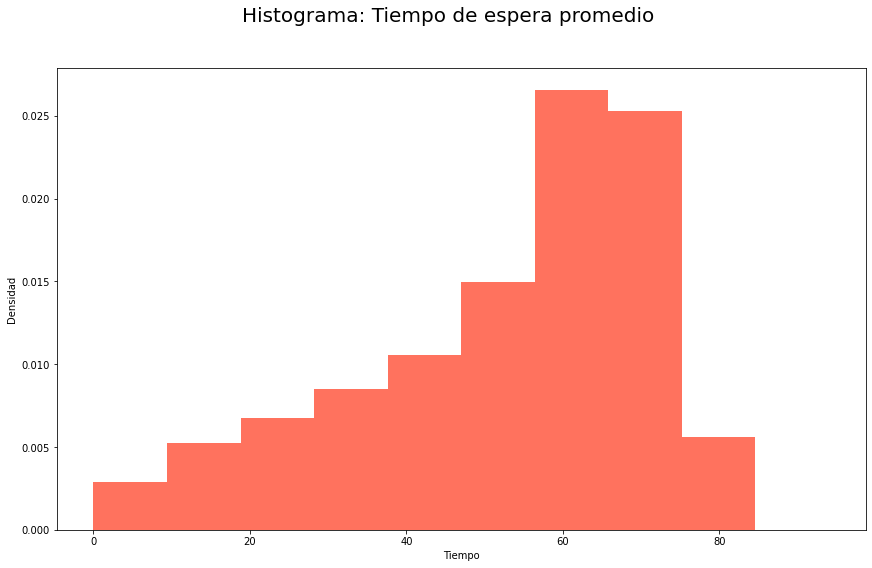

In [6]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractionsExperienced == 0:
        continue

    avgWaitTime.append(guest.totalWaitTime / guest.attractionsExperienced)

print(np.mean(avgWaitTime))

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(avgWaitTime, density=True, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [7]:
attrWaitTime = [[attr.name, attr.queue.topWaitTime] for attr in park.attractions]
attrDF = pd.DataFrame(attrWaitTime, columns=["Name", "MaximunWaitTime"])
attrDF

,Name,MaximunWaitTime
0,Dropper,25
1,Tornado,25
2,BumpCars,10
3,SlowRiver,0
4,StarWarsRide,35
5,SpaceMountain,30
